In [ ]:
import sys, os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_loader import load_cookie_cats

df = load_cookie_cats()
df.head(10)

Dataset path: /Users/stolero.ofek/.cache/kagglehub/datasets/yufengsui/mobile-games-ab-testing/versions/1


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [26]:
print(f'shape:\n{df.shape}\n')
print(f'dtypes:\n{df.dtypes}\n')
print(f'describe sum_gamerounds:\n{df.sum_gamerounds.describe()}\n')
print(f'versions counts:\n{df.version.value_counts()}\n')

shape:
(90189, 5)

dtypes:
userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

describe sum_gamerounds:
count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

versions counts:
version
gate_40    45489
gate_30    44700
Name: count, dtype: int64



In [38]:
df.groupby("version")['sum_gamerounds'].agg(['mean','median','max'])


,mean,median,max
version,,,
gate_30,52.456264,17.0,49854
gate_40,51.298776,16.0,2640


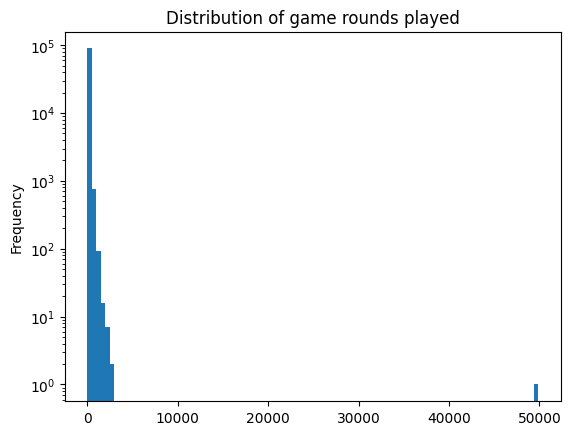

In [ ]:
df['sum_gamerounds'].plot(kind='hist', bins=100, log=True)
plt.title("Distribution of game rounds played")
plt.show()


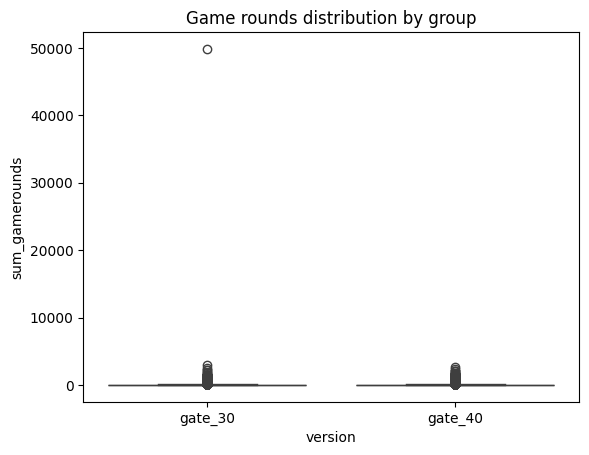

version
gate_30    52.456264
gate_40    51.298776
Name: sum_gamerounds, dtype: float64

In [34]:
sns.boxplot(x="version", y="sum_gamerounds", data=df)
plt.title("Game rounds distribution by group")
plt.show()

df.groupby("version")['sum_gamerounds'].mean()

### we can clearly see a dragged mean value by an ouliner so I got rid of it for clearer view

In [ ]:
# outliners:
df[df['sum_gamerounds'] > 5000]

,userid,version,sum_gamerounds,retention_1,retention_7,heavy_player
57702,6390605,gate_30,49854,False,True,True


In [50]:
data_without_outliner = df[df['sum_gamerounds'] < 5000]

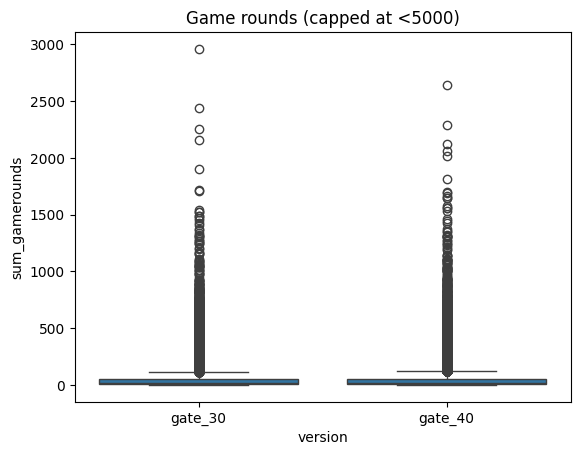

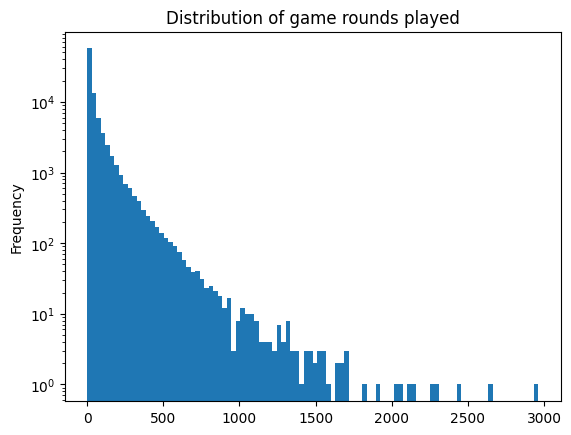

In [ ]:
sns.boxplot(x="version", y="sum_gamerounds", data=data_without_outliner)
plt.title("Game rounds (capped at <5000)")
plt.show()

data_without_outliner['sum_gamerounds'].plot(kind='hist', bins=100, log=True)
plt.title("Distribution of game rounds played")
plt.show()

# Retention Analysis:

   version  retention_1  retention_7
0  gate_30     0.448188     0.190201
1  gate_40     0.442283     0.182000


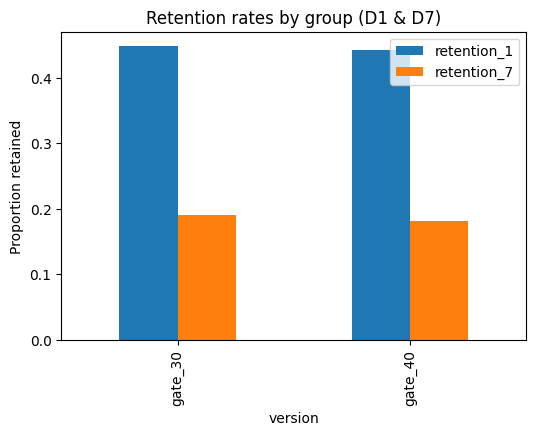

In [52]:
retention = df.groupby("version")[['retention_1','retention_7']].mean().reset_index()
print(retention)

retention.plot(x="version", y=["retention_1","retention_7"], kind="bar", figsize=(6,4))
plt.title("Retention rates by group (D1 & D7)")
plt.ylabel("Proportion retained")
plt.show()


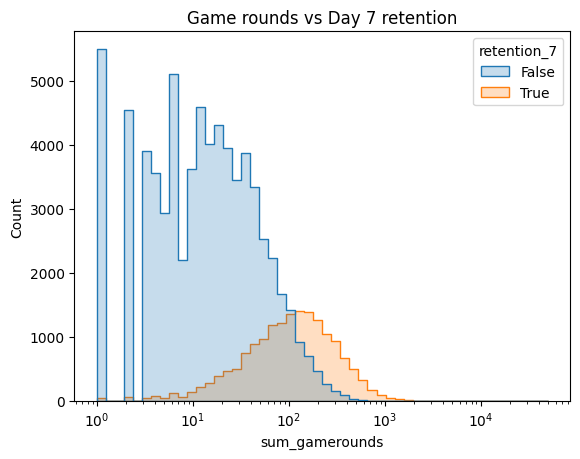

version  retention_7
gate_30  False           11.0
         True           105.0
gate_40  False           11.0
         True           111.0
Name: sum_gamerounds, dtype: float64

In [60]:
sns.histplot(data=df, x="sum_gamerounds", hue="retention_7", bins=50, element="step", log_scale=(True, False))
plt.title("Game rounds vs Day 7 retention")
plt.show()

df.groupby(['version','retention_7'])['sum_gamerounds'].median()


In [54]:
df['heavy_player'] = df['sum_gamerounds'] > df['sum_gamerounds'].median()

pd.crosstab(df['heavy_player'], df['retention_1'], normalize='index')


retention_1,False,True
heavy_player,,
False,0.838565,0.161435
True,0.270771,0.729229


In [53]:
df['heavy_player'] = df['sum_gamerounds'] > df['sum_gamerounds'].median()

pd.crosstab(df['heavy_player'], df['retention_7'], normalize='index')


retention_7,False,True
heavy_player,,
False,0.974376,0.025624
True,0.653356,0.346644
